In [14]:
# EDA walkthrough: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

I have categorized each variable in the dataset based on my expected relevance to predicting the sale price. I have determined the following to have "high" expected relevance.

1. Neighborhood
2. BldgType
3. HouseStyle
4. OverallQual
5. OverallCond
6. YearRemodAdd
7. ExterQual
8. ExterCond
9. CentralAir
10. KitchenQual
11. Functional

Now I am just going through and making different plots on the data.

In [16]:
exp_rel_features = [
    "Neighborhood",
    "BldgType",
    "HouseStyle",
    "OverallQual",
    "OverallCond",
    "YearRemodAdd",
    "ExterQual",
    "ExterCond",
    "CentralAir",
    "KitchenQual",
    "Functional",
]

##### Neighborhood EDA

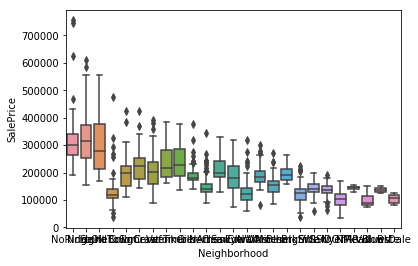

In [118]:
x = "Neighborhood"
y = "SalePrice"
subset = df_train[[x, y]].copy()
subset.sort_values(by=[y], ascending=False, inplace=True)
sns.boxplot(x = x, y = y, data=subset)

In [119]:
df_train[x].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [109]:
df_train[[x,y]].groupby(x).describe().sort_values(by=[(y, 'mean')], ascending=False)

SalePrice                                                     \
                 count           mean            std       min        25%   
Neighborhood                                                                
NoRidge           41.0  335295.317073  121412.658640  190000.0  265000.00   
NridgHt           77.0  316270.623377   96392.544954  154000.0  253293.00   
StoneBr           25.0  310499.000000  112969.676640  170000.0  213500.00   
Timber            38.0  242247.447368   64845.651549  137500.0  186900.00   
Veenker           11.0  238772.727273   72369.317959  162500.0  184250.00   
Somerst           86.0  225379.837209   56177.555888  144152.0  177975.00   
ClearCr           28.0  212565.428571   50231.538993  130000.0  183750.00   
Crawfor           51.0  210624.725490   68866.395472   90350.0  159250.00   
CollgCr          150.0  197965.773333   51403.666438  110000.0  152958.75   
Blmngtn           17.0  194870.882353   30393.229219  159895.0  174000.00   
Gilbert           79.0  192854.506329   35986.779085  141000.0  174000.00   
NWAmes            73.0  189050.068493   37172.218106   82500.0  165150.00   
SawyerW           59.0  186555.796610   55651.997820   76000.0  145500.00   
Mitchel           49.0  156270.122449   36486.625334   84500.0  131000.00   
NAmes            225.0  145847.080000   33075.345450   87500.0  127500.00   
NPkVill            9.0  142694.444444    9377.314529  127500.0  140000.00   
SWISU             25.0  142591.360000   32622.917679   60000.0  128000.00   
Blueste            2.0  137500.000000   19091.883092  124000.0  130750.00   
Sawyer            74.0  136793.135135   22345.129157   62383.0  127250.00   
OldTown          113.0  128225.300885   52650.583185   37900.0  105900.00   
Edwards          100.0  128219.700000   43208.616459   58500.0  101500.00   
BrkSide           58.0  124834.051724   40348.689270   39300.0  100500.00   
BrDale            16.0  104493.750000   14330.176493   83000.0   91000.00   
IDOTRR            37.0  100123.783784   33376.710117   34900.0   81000.00   
MeadowV           17.0   98576.470588   23491.049610   75000.0   83500.00   

                                             
                   50%        75%       max  
Neighborhood                                 
NoRidge       301500.0  341000.00  755000.0  
NridgHt       315000.0  374000.00  611657.0  
StoneBr       278000.0  377426.00  556581.0  
Timber        228475.0  286115.75  378500.0  
Veenker       218000.0  282000.00  385000.0  
Somerst       225500.0  252919.50  423000.0  
ClearCr       200250.0  242225.00  328000.0  
Crawfor       200624.0  239000.00  392500.0  
CollgCr       197200.0  225725.00  424870.0  
Blmngtn       191000.0  213490.00  264561.0  
Gilbert       181000.0  197200.00  377500.0  
NWAmes        182900.0  205000.00  299800.0  
SawyerW       179900.0  222500.00  320000.0  
Mitchel       153500.0  171000.00  271000.0  
NAmes         140000.0  158000.00  345000.0  
NPkVill       146000.0  148500.00  155000.0  
SWISU         139500.0  160000.00  200000.0  
Blueste       137500.0  144250.00  151000.0  
Sawyer        135000.0  149462.50  190000.0  
OldTown       119000.0  140000.00  475000.0  
Edwards       121750.0  145225.00  320000.0  
BrkSide       124300.0  141175.00  223500.0  
BrDale        106000.0  118000.00  125000.0  
IDOTRR        103000.0  120500.00  169500.0  
MeadowV        88000.0  115000.00  151400.0

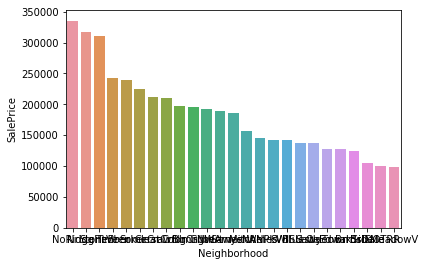

In [110]:
grouped_means = df_train[[x,y]].groupby(x).describe()
grouped_means = grouped_means[(y, 'mean')]
display_dict = {
    x: list(grouped_means.index),
    y: list(grouped_means)
}
display_df = pd.DataFrame(display_dict).sort_values(by=[y], ascending=False)
sns.barplot(x = x, y = y, data=display_df)

A one way ANOVA test shows the ratio of variance between groups divided by the variance within groups.

F = Variance_Between / Variance_Within

Variance_Between = (Sum of Squares Between) / (num_group - 1)
Variance_Within = (Sum of Squares Within) / (num_group * (num_sample - 1))

Sum of Squares Between = sum(group_mean - grand_mean for sample in group for group in groups)

Sum of Squares Within = sum(sample - group_mean for sample in group for group in groups)

The (num_group - 1) is the degrees of freedom for the Sum of Squares Between. Degrees of freedom means the number of independent observations we have. We know the sum of sample residuals from their mean is always zero. Therefore if we knew the grand mean, we would only need to know (num_group - 1) to determine all group means. 

The (num_group * (num_sample - 1)) is the degrees of freedom for the Sum of Squares Within. In the same light, for each group, if we knew the group mean, we would only need (num_samples - 1) samples to know all samples. When summing num_group groups, we would only need (num_group * (num_sample - 1)) to know all samples if the group means were given.


In [111]:
groups = [data[y] for name, data in df_train.groupby(x)]
stats.f_oneway(*groups)

F_onewayResult(statistic=71.78486512058278, pvalue=1.5586002827707996e-225)

#### Note
Wow! The probability that I would get this F-statistic if the group means were equal is 1.59e-225... Safe to say at least one of these means are not equal and we'll go ahead and reject the null hypothesis 

##### KitchenQual EDA

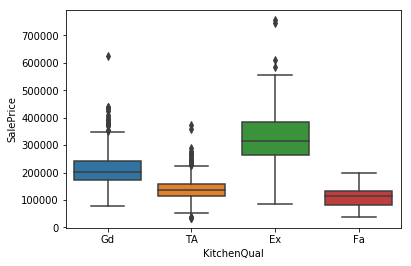

In [120]:
x = "KitchenQual"
y = "SalePrice"
sns.boxplot(x = x, y = y, data = df_train[[x, y]])

In [121]:
groups = [data[y] for name, data in df_train.groupby(x)]
stats.f_oneway(*groups)

F_onewayResult(statistic=407.80635155838854, pvalue=3.0322127528402335e-192)

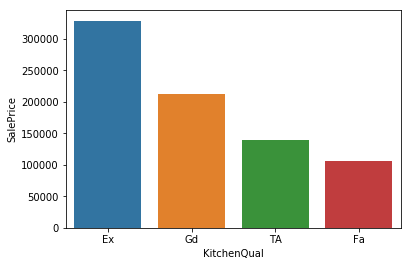

In [122]:
grouped_means = df_train[[x,y]].groupby(x).describe()
grouped_means = grouped_means[(y, 'mean')]
display_dict = {
    x: list(grouped_means.index),
    y: list(grouped_means)
}
display_df = pd.DataFrame(display_dict).sort_values(by=[y], ascending=False)
sns.barplot(x = x, y = y, data=display_df)